In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('df_renamed.csv', index_col='datetime', encoding='latin1', parse_dates=True, dayfirst=True)

In [5]:
df.head()

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,date,year,month,day,hour
datetime,,,,,,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,1,0
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,1,1
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,1,2
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,1,3
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,2017,12,1,4


In [6]:
df.shape

(8760, 17)

In [7]:
df.columns

Index(['count', 'temp', 'humidity', 'wind_speed', 'visibility',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day', 'date', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [8]:
# only keep variables needed
variables_kept = ['count', 'temp', 'humidity', 'wind_speed', 'visibility',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'functioning_day']
df = df[variables_kept]

In [9]:
df.head(2)

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
datetime,,,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Feature Engineering

##### (this section is for time series analysis purpose)

### Categorical varaible encoding

##### "season" - target-guided encoding

In [10]:
# "seasons" - target-guided encoding
# encoded by the seasonal variation (lowest to highest)
# winter - spring - autum - spring

In [11]:
# let's explore the relationship of the categories with the target

spring = df[df['seasons'] == 'Spring']
summer = df[df['seasons'] == 'Summer']
autumn = df[df['seasons'] == 'Autumn']
winter = df[df['seasons'] == 'Winter']

print('spring: ', round(spring['count'].mean(),0), "per hour")
print('summer: ', round(summer['count'].mean(),0), "per hour")
print('autumn: ', round(autumn['count'].mean(), 0), "per hour")
print('winter: ', round(winter['count'].mean(),0), "per hour")

spring:  730.0 per hour
summer:  1034.0 per hour
autumn:  820.0 per hour
winter:  226.0 per hour


In [12]:
# order the season labels according to the mean target value
df.groupby(['seasons'])['count'].mean().sort_values()

seasons
Winter     225.541204
Spring     730.031250
Autumn     819.597985
Summer    1034.073370
Name: count, dtype: float64

In [13]:
# generate an ordered list with the labels
ordered_labels = df.groupby(['seasons'])['count'].mean().sort_values().index

ordered_labels

Index(['Winter', 'Spring', 'Autumn', 'Summer'], dtype='object', name='seasons')

In [14]:
# create a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'Winter': 0, 'Spring': 1, 'Autumn': 2, 'Summer': 3}

In [15]:
# replace the labels with the integers (results propogated from training to test set)

df['seasons'] = df['seasons'].map(ordinal_mapping)

In [16]:
# check the results
df['seasons'].head(10)

datetime
2017-12-01 00:00:00    0
2017-12-01 01:00:00    0
2017-12-01 02:00:00    0
2017-12-01 03:00:00    0
2017-12-01 04:00:00    0
2017-12-01 05:00:00    0
2017-12-01 06:00:00    0
2017-12-01 07:00:00    0
2017-12-01 08:00:00    0
2017-12-01 09:00:00    0
Name: seasons, dtype: int64

##### "holiday" & "functioning_day" - OneHotEncoding

In [17]:
df_cat = df[['holiday', 'functioning_day']]

In [18]:
df_cat.head()

,holiday,functioning_day
datetime,,
2017-12-01 00:00:00,No Holiday,Yes
2017-12-01 01:00:00,No Holiday,Yes
2017-12-01 02:00:00,No Holiday,Yes
2017-12-01 03:00:00,No Holiday,Yes
2017-12-01 04:00:00,No Holiday,Yes


In [19]:
df_rest = df.drop(df_cat, axis=1)

In [20]:
df_rest.head()

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons
datetime,,,,,,,,,,
2017-12-01 00:00:00,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0
2017-12-01 01:00:00,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0
2017-12-01 02:00:00,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0
2017-12-01 03:00:00,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0
2017-12-01 04:00:00,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0


In [21]:
# obtain k-1 labels
df_cat = pd.get_dummies(df_cat[['holiday', 'functioning_day']], drop_first=True)

In [22]:
df_cat.head()

,holiday_No Holiday,functioning_day_Yes
datetime,,
2017-12-01 00:00:00,1,1
2017-12-01 01:00:00,1,1
2017-12-01 02:00:00,1,1
2017-12-01 03:00:00,1,1
2017-12-01 04:00:00,1,1


In [23]:
df = pd.concat([df_cat, df_rest], axis=1)

In [24]:
df.head()

,holiday_No Holiday,functioning_day_Yes,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons
datetime,,,,,,,,,,,,
2017-12-01 00:00:00,1,1,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0
2017-12-01 01:00:00,1,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0
2017-12-01 02:00:00,1,1,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0
2017-12-01 03:00:00,1,1,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0
2017-12-01 04:00:00,1,1,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0


In [25]:
df.columns

Index(['holiday_No Holiday', 'functioning_day_Yes', 'count', 'temp',
       'humidity', 'wind_speed', 'visibility', 'dew_point_temp',
       'solar_radiation', 'rainfall', 'snowfall', 'seasons'],
      dtype='object')

In [26]:
# save as csv
df.to_csv('df_before_downsampling.csv')

### Plot the source data

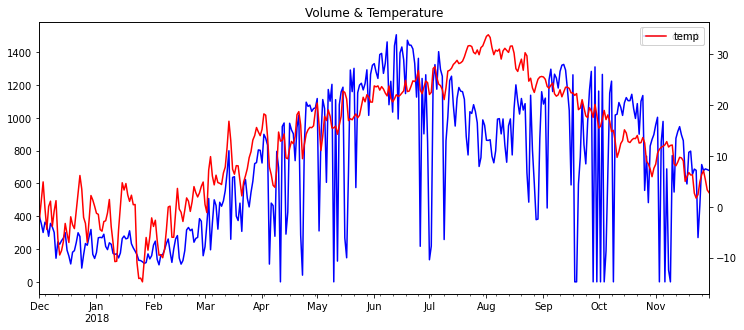

In [27]:
# freq = daily
fig, ax = plt.subplots()

title = 'Volume & Temperature'
ylabel=''
xlabel=''

ax = df['count'].resample(rule='D').mean().plot(figsize=(12,5),title=title,legend=True, color='blue')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax2 = ax.twinx()
ax2 = df['temp'].resample(rule='D').mean().plot(legend=True, color='red');

In [28]:
# For prediction purpose, I decided to downsample the frequency from hourly to daily

---

# Model Building

### Downsampling

##### (frequency = daiy)

In [29]:
df.columns

Index(['holiday_No Holiday', 'functioning_day_Yes', 'count', 'temp',
       'humidity', 'wind_speed', 'visibility', 'dew_point_temp',
       'solar_radiation', 'rainfall', 'snowfall', 'seasons'],
      dtype='object')

In [30]:
df_target = df[['count']]
df_cat = df[['seasons', 'holiday_No Holiday', 'functioning_day_Yes']]
df_num = df[['temp',
       'humidity', 'wind_speed', 'visibility', 'dew_point_temp',
       'solar_radiation', 'rainfall', 'snowfall']]

In [31]:
df_target = df_target.resample(rule='D').sum()
df_cat = df_cat.resample(rule='D').mean()
df_num = df_num.resample(rule='D').mean()

In [32]:
df = pd.concat([df_target, df_num, df_cat], axis=1)

In [33]:
df.head(2)

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday_No Holiday,functioning_day_Yes
datetime,,,,,,,,,,,,
2017-12-01,9539,-2.454167,45.875000,1.5375,1870.750000,-13.545833,0.24875,0.0,0.0,0,1.0,1.0
2017-12-02,8523,1.325000,61.958333,1.7125,1471.083333,-5.716667,0.26375,0.0,0.0,0,1.0,1.0


In [34]:
df.isnull().sum()

count                  0
temp                   0
humidity               0
wind_speed             0
visibility             0
dew_point_temp         0
solar_radiation        0
rainfall               0
snowfall               0
seasons                0
holiday_No Holiday     0
functioning_day_Yes    0
dtype: int64

In [35]:
df = df.dropna()

In [36]:
df.head(2)

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday_No Holiday,functioning_day_Yes
datetime,,,,,,,,,,,,
2017-12-01,9539,-2.454167,45.875000,1.5375,1870.750000,-13.545833,0.24875,0.0,0.0,0,1.0,1.0
2017-12-02,8523,1.325000,61.958333,1.7125,1471.083333,-5.716667,0.26375,0.0,0.0,0,1.0,1.0


In [37]:
df.shape

(365, 12)

### Test for stationarity, perform any necessary transformations

##### (Test)

In [38]:
# augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

In [39]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [40]:
for x in df.columns:
    adf_test(df[x])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.818487e+00
p-value                 1.905491e-14
# lags used             0.000000e+00
# observations          3.640000e+02
critical value (1%)    -3.448443e+00
critical value (5%)    -2.869513e+00
critical value (10%)   -2.571018e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic       -1.255284
p-value                   0.649374
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
Augmented Dickey-Fuller Test: 
ADF test statistic       -4.547850
p-value                   0.000161
# lags used               7.000000
# observations          357.000000
critical value (1%)      -3.4488

In [41]:
# 4 variables are non-stationary; differencing is needed

In [42]:
# take a first order difference of the entire df and re-run the DF test
df_transformed = df.diff()

In [43]:
df_transformed = df_transformed.dropna()

In [44]:
for x in df_transformed.columns:
    adf_test(df_transformed[x])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.361024e+01
p-value                 1.879297e-25
# lags used             4.000000e+00
# observations          3.590000e+02
critical value (1%)    -3.448697e+00
critical value (5%)    -2.869625e+00
critical value (10%)   -2.571077e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic     -1.094612e+01
p-value                 9.037981e-20
# lags used             5.000000e+00
# observations          3.580000e+02
critical value (1%)    -3.448749e+00
critical value (5%)    -2.869647e+00
critical value (10%)   -2.571089e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic     -8.912081e+00
p-value                 1.097397e-14
# lags used             1.100000e+01
# observations          3.520000e+02
critical value (1%)

In [45]:
# all variables are stationary now

In [46]:
df_transformed.head()

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday_No Holiday,functioning_day_Yes
datetime,,,,,,,,,,,,
2017-12-02,-1016.0,3.779167,16.083333,0.175000,-399.666667,7.829167,0.015000,0.000000,0.000000,0.0,0.0,0.0
2017-12-03,-1301.0,3.550000,19.583333,-0.100000,-1015.333333,7.600000,-0.138333,0.166667,0.000000,0.0,0.0,0.0
2017-12-04,1507.0,-5.179167,-29.041667,1.837500,907.083333,-11.808333,0.157500,-0.162500,0.000000,0.0,0.0,0.0
2017-12-05,-422.0,-4.154167,-16.083333,-2.341667,596.625000,-7.500000,-0.247083,-0.004167,0.000000,0.0,0.0,0.0
2017-12-06,-1638.0,4.504167,34.375000,-0.412500,-772.583333,12.237500,0.220000,0.054167,0.358333,0.0,0.0,0.0


### Train test split

In [47]:
# load forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse
from pmdarima import auto_arima

In [48]:
# our goal is to predict the next month
# save 28 data points for testing
nobs=28
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [49]:
print(train.shape)
print(test.shape)

(336, 12)
(28, 12)


### VAR Model

In [50]:
# we'll fit a series of  models using the first seven p-values, and base
# our final selection on the model that provides the lowest AIC and BIC scores
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.729513524740673
BIC:  16.505645951501002

Order = 2
AIC:  14.427911971173172
BIC:  17.851092503786976

Order = 3
AIC:  14.33540259219514
BIC:  19.412925912169065

Order = 4
AIC:  14.27455808441134
BIC:  21.013773029359818

Order = 5
AIC:  14.249859072295584
BIC:  22.658169195485947

Order = 6
AIC:  14.349342906464152
BIC:  24.434207043759365

Order = 7
AIC:  14.410830477404732
BIC:  26.179763321722902

Order = 8
AIC:  14.651773001318668
BIC:  28.11234568473069

Order = 9
AIC:  14.564672316914983
BIC:  29.724513000503993

Order = 10
AIC:  14.675682859886253
BIC:  31.54247733149503



In [51]:
model = VAR(train)
for i in [1,2,3,4,5,6,7,8,9,10]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.729513524740673
BIC:  16.505645951501002

Order = 2
AIC:  14.427911971173172
BIC:  17.851092503786976

Order = 3
AIC:  14.33540259219514
BIC:  19.412925912169065

Order = 4
AIC:  14.27455808441134
BIC:  21.013773029359818

Order = 5
AIC:  14.249859072295584
BIC:  22.658169195485947

Order = 6
AIC:  14.349342906464152
BIC:  24.434207043759365

Order = 7
AIC:  14.410830477404732
BIC:  26.179763321722902

Order = 8
AIC:  14.651773001318668
BIC:  28.11234568473069

Order = 9
AIC:  14.564672316914983
BIC:  29.724513000503993

Order = 10
AIC:  14.675682859886253
BIC:  31.54247733149503



In [52]:
# The VAR(5) model returns the lowest combined scores

##### (Fit a VAR(5) model)

In [53]:
results = model.fit(5)

##### (Predict the next 28 values)

In [54]:
lag_order = results.k_ar
lag_order

5

In [55]:
z = results.forecast(y=train.values[-lag_order:], steps=28)
z

array([[-7.67122921e+02,  9.10031887e-01,  1.29681892e+00,
         3.29568763e-01,  8.08213153e+01,  1.32454982e+00,
        -3.36170745e-03, -1.91143877e-01,  1.14955486e-03,
         2.96117959e-02, -8.70191711e-02,  4.51565391e-02],
       [-7.00357554e+02, -4.22570581e-01,  1.07830096e+00,
         4.38233925e-02,  7.73785752e+01, -3.19858224e-01,
         2.51180438e-02,  1.82492990e-01,  8.35512987e-03,
        -9.16611875e-03,  3.13611627e-02, -4.80946541e-02],
       [-4.30437811e+02, -4.54650424e-01, -1.95762300e+00,
         2.30736226e-03,  1.11185052e+02, -7.37038731e-01,
        -3.78564030e-02, -7.40420231e-03,  2.20789389e-02,
        -3.19443293e-03,  2.57555325e-02,  2.71330907e-03],
       [ 1.00534653e+03, -1.27087494e-01,  8.24404125e-01,
         3.75080931e-02,  4.58341048e+01,  4.09920789e-02,
        -4.86760535e-03, -3.14799178e-02,  3.79619738e-02,
        -2.51495639e-02,  4.41287383e-02,  3.09651124e-02],
       [-8.20865656e+02, -1.85900936e-01,  1.2781388

In [56]:
test

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday_No Holiday,functioning_day_Yes
datetime,,,,,,,,,,,,
2018-11-03,-24077.0,0.754167,2.333333,0.108333,-393.291667,1.062500,0.002917,0.000000,0.000000,0.0,0.0,-1.0
2018-11-04,20471.0,0.408333,-1.708333,0.145833,170.041667,-0.070833,-0.007500,0.000000,0.000000,0.0,0.0,1.0
2018-11-05,3001.0,0.195833,12.125000,-0.320833,-502.208333,3.454167,-0.096667,0.000000,0.000000,0.0,0.0,0.0
2018-11-06,-23472.0,0.275000,2.916667,-0.154167,-328.333333,1.204167,-0.135000,0.000000,0.000000,0.0,0.0,-1.0
2018-11-07,16525.0,0.641667,10.375000,0.216667,189.083333,2.787500,-0.158333,0.083333,0.000000,0.0,0.0,1.0
2018-11-08,-14804.0,-1.066667,11.375000,0.758333,267.333333,0.970833,-0.114167,1.833333,0.000000,0.0,0.0,0.0
2018-11-09,-1721.0,0.316667,-20.791667,1.170833,260.166667,-3.716667,0.351667,-1.125000,0.000000,0.0,0.0,-1.0
2018-11-10,18473.0,0.079167,-1.541667,-1.750000,-672.500000,-0.525000,0.057917,-0.791667,0.000000,0.0,0.0,1.0
2018-11-11,-5335.0,-3.712500,0.500000,-0.279167,296.333333,-3.125000,-0.309167,0.000000,0.000000,0.0,0.0,0.0


In [57]:
test.columns

Index(['count', 'temp', 'humidity', 'wind_speed', 'visibility',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday_No Holiday', 'functioning_day_Yes'],
      dtype='object')

In [58]:
idx = pd.date_range('11/03/2018', periods=28, freq = 'D')
df_forecast_var = pd.DataFrame(z, index=idx, columns=['count1d', 'temp', 'humidity', 'wind_speed', 'visibility',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday_No Holiday', 'functioning_day_Yes'])
df_forecast_var

,count1d,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday_No Holiday,functioning_day_Yes
2018-11-03,-767.122921,0.910032,1.296819,0.329569,80.821315,1.324550,-0.003362,-0.191144,0.001150,0.029612,-0.087019,0.045157
2018-11-04,-700.357554,-0.422571,1.078301,0.043823,77.378575,-0.319858,0.025118,0.182493,0.008355,-0.009166,0.031361,-0.048095
2018-11-05,-430.437811,-0.454650,-1.957623,0.002307,111.185052,-0.737039,-0.037856,-0.007404,0.022079,-0.003194,0.025756,0.002713
2018-11-06,1005.346534,-0.127087,0.824404,0.037508,45.834105,0.040992,-0.004868,-0.031480,0.037962,-0.025150,0.044129,0.030965
2018-11-07,-820.865656,-0.185901,1.278139,-0.072217,-16.200680,0.150947,-0.008982,0.035947,-0.020583,0.032886,-0.021829,-0.034394
2018-11-08,477.952681,-0.278968,-0.044088,-0.027667,-48.240967,-0.228506,-0.001115,0.016556,-0.051730,0.002690,0.004142,0.015894
2018-11-09,662.235588,0.062589,-1.899652,0.030186,8.710682,-0.374156,0.057249,-0.127949,0.007268,0.003684,-0.026917,-0.001827
2018-11-10,-873.253306,0.208399,0.997721,-0.014619,-30.190281,0.395157,-0.032803,0.096350,-0.001177,0.019698,-0.011331,-0.005534
2018-11-11,99.770644,0.148570,0.010556,0.019804,-13.755321,0.110774,-0.003095,0.022825,0.008979,0.006033,0.030899,0.001204
2018-11-12,307.460341,0.028543,-0.439963,0.004480,25.539899,-0.087720,0.011315,-0.043701,0.008586,-0.002675,-0.009887,0.008361


##### (Invert the transformation)

In [59]:
# build the forecast values from the first difference set
df_forecast_var['count_Forecast'] = df['count'].iloc[-nobs-1] + df_forecast_var['count1d'].cumsum()

In [60]:
df_forecast_var.head()

,count1d,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday_No Holiday,functioning_day_Yes,count_Forecast
2018-11-03,-767.122921,0.910032,1.296819,0.329569,80.821315,1.324550,-0.003362,-0.191144,0.001150,0.029612,-0.087019,0.045157,23309.877079
2018-11-04,-700.357554,-0.422571,1.078301,0.043823,77.378575,-0.319858,0.025118,0.182493,0.008355,-0.009166,0.031361,-0.048095,22609.519526
2018-11-05,-430.437811,-0.454650,-1.957623,0.002307,111.185052,-0.737039,-0.037856,-0.007404,0.022079,-0.003194,0.025756,0.002713,22179.081714
2018-11-06,1005.346534,-0.127087,0.824404,0.037508,45.834105,0.040992,-0.004868,-0.031480,0.037962,-0.025150,0.044129,0.030965,23184.428248
2018-11-07,-820.865656,-0.185901,1.278139,-0.072217,-16.200680,0.150947,-0.008982,0.035947,-0.020583,0.032886,-0.021829,-0.034394,22363.562592


##### (Plot predicted values against test set)

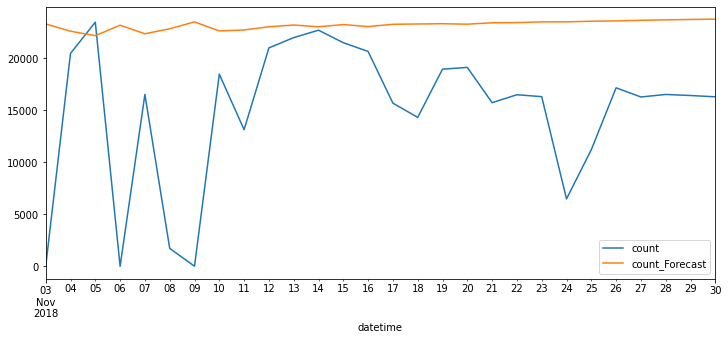

In [61]:
df['count'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast_var['count_Forecast'].plot(legend=True);

In [62]:
RMSE1 = rmse(df['count'][-nobs:], df_forecast_var['count_Forecast'])
print(f'count_prediction VAR(2) RMSE: {RMSE1:.3f}')

count_prediction VAR(2) RMSE: 10817.497


---

##### (frequency = weekly)

In [63]:
df = pd.read_csv('df_before_downsampling.csv', index_col='datetime', parse_dates=True, dayfirst=True)

In [64]:
df.head(5)

,holiday_No Holiday,functioning_day_Yes,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons
datetime,,,,,,,,,,,,
2017-12-01 00:00:00,1,1,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0
2017-12-01 01:00:00,1,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0
2017-12-01 02:00:00,1,1,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0
2017-12-01 03:00:00,1,1,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0
2017-12-01 04:00:00,1,1,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0


In [65]:
df_target = df[['count']]
df_predictor = df[['temp',
       'humidity', 'wind_speed', 'visibility', 'dew_point_temp',
       'solar_radiation', 'rainfall', 'snowfall', 'seasons', 'holiday_No Holiday', 'functioning_day_Yes']]

In [66]:
df_target = df_target.resample(rule='W').sum()
df_predictor = df_predictor.resample(rule='W').mean()

In [67]:
df = pd.concat([df_target, df_predictor], axis=1)

In [68]:
df.head()

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday_No Holiday,functioning_day_Yes
datetime,,,,,,,,,,,,
2017-12-03,25284,1.248611,63.125000,1.620833,1265.861111,-5.793056,0.212639,0.055556,0.000000,0.0,1.000000,1.0
2017-12-10,50972,-1.014881,54.958333,1.697024,1462.113095,-9.740476,0.207917,0.032738,0.306548,0.0,1.000000,1.0
2017-12-17,39367,-6.685714,42.898810,2.022619,1719.136905,-17.596429,0.235952,0.000000,0.000000,0.0,1.000000,1.0
2017-12-24,33078,0.243452,70.178571,1.380952,846.642857,-4.880357,0.149821,0.140476,1.251190,0.0,0.714286,1.0
2017-12-31,36629,-1.619643,52.136905,1.900595,1329.529762,-11.111310,0.218095,0.010119,0.085119,0.0,0.714286,1.0


In [69]:
df = df.dropna()

In [70]:
df.shape

(53, 12)

### Test for stationarity, perform any necessary transformations

##### (Test)

In [71]:
for x in df.columns:
    adf_test(df[x])

Augmented Dickey-Fuller Test: 
ADF test statistic      -2.134200
p-value                  0.230987
# lags used              0.000000
# observations          52.000000
critical value (1%)     -3.562879
critical value (5%)     -2.918973
critical value (10%)    -2.597393
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
Augmented Dickey-Fuller Test: 
ADF test statistic      -1.417337
p-value                  0.573937
# lags used              3.000000
# observations          49.000000
critical value (1%)     -3.571472
critical value (5%)     -2.922629
critical value (10%)    -2.599336
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
Augmented Dickey-Fuller Test: 
ADF test statistic      -5.010286
p-value                  0.000021
# lags used              0.000000
# observations          52.000000
critical value (1%)     -3.562879
critical value (5%)  

In [72]:
# 6 variables are non-stationary, differencing is needed

In [73]:
# take a first order difference of the entire df and re-run the DF test
df_transformed = df.diff()

In [74]:
df_transformed = df_transformed.dropna()

In [75]:
for x in df_transformed.columns:
    adf_test(df_transformed[x])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.746633e+00
p-value                 8.222687e-17
# lags used             0.000000e+00
# observations          5.100000e+01
critical value (1%)    -3.565624e+00
critical value (5%)    -2.920142e+00
critical value (10%)   -2.598015e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic      -2.603244
p-value                  0.092329
# lags used              2.000000
# observations          49.000000
critical value (1%)     -3.571472
critical value (5%)     -2.922629
critical value (10%)    -2.599336
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
Augmented Dickey-Fuller Test: 
ADF test statistic     -1.137379e+01
p-value                 8.846979e-21
# lags used             0.000000e+00
# observations          5.100000e+01
critical value (1%)    -3.56562

In [76]:
# there still are variables that are non-stationary

In [77]:
# second order differencing
df_transformed = df_transformed.diff().dropna()

In [78]:
for x in df_transformed.columns:
    adf_test(df_transformed[x])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.498590e+00
p-value                 1.177249e-08
# lags used             4.000000e+00
# observations          4.600000e+01
critical value (1%)    -3.581258e+00
critical value (5%)    -2.926785e+00
critical value (10%)   -2.601541e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic     -1.137688e+01
p-value                 8.701948e-21
# lags used             1.000000e+00
# observations          4.900000e+01
critical value (1%)    -3.571472e+00
critical value (5%)    -2.922629e+00
critical value (10%)   -2.599336e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic      -5.348361
p-value                  0.000004
# lags used              8.000000
# observations          42.000000
critical value (1%)     -3.5966

In [79]:
# So far all variables are stationary

In [80]:
df_transformed.head()

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday_No Holiday,functioning_day_Yes
datetime,,,,,,,,,,,,
2017-12-17,-37293.0,-3.407341,-3.892857,0.249405,60.771825,-3.908532,0.032758,-0.009921,-0.613095,0.0,0.000000e+00,0.0
2017-12-24,5316.0,12.600000,39.339286,-0.967262,-1129.517857,20.572024,-0.114167,0.173214,1.557738,0.0,-2.857143e-01,0.0
2017-12-31,9840.0,-8.792262,-45.321429,1.161310,1355.380952,-18.947024,0.154405,-0.270833,-2.417262,0.0,2.857143e-01,0.0
2018-01-07,382.0,0.778571,9.565476,-0.895833,-123.065476,3.531548,-0.052500,0.120238,1.080952,0.0,1.428571e-01,0.0
2018-01-14,-13267.0,-1.280357,18.773810,0.847619,-611.142857,3.132143,-0.034762,0.022619,0.250000,0.0,1.110223e-16,0.0


### Train test split

In [81]:
# our goal is to predict the next month
# save 4 data points for testing
nobs=4
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [82]:
print(train.shape)
print(test.shape)

(47, 12)
(4, 12)


##### (VAR model order selection)

In [83]:
# we'll fit a series of  models using the first seven p-values, and base
# our final selection on the model that provides the lowest AIC and BIC scores
for i in [1,2]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  15.670825207823981
BIC:  21.872304726352215

Order = 2
AIC:  11.522806023930302
BIC:  23.5672226223991



In [84]:
model = VAR(train)
for i in [1,2]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  15.670825207823981
BIC:  21.872304726352215

Order = 2
AIC:  11.522806023930302
BIC:  23.5672226223991



In [85]:
# The VAR(2) model returns the lowest combined scores

##### (Fit a VAR(2) model)

In [86]:
results = model.fit(2)

##### (Predict the next 4 values)

In [87]:
lag_order = results.k_ar
lag_order

2

In [88]:
z = results.forecast(y=train.values[-lag_order:], steps=4)
z

array([[-1.01736470e+04,  2.48103170e+00,  2.55789487e+01,
         2.31992303e-01, -7.74463631e+02,  8.44883134e+00,
        -3.51681045e-01,  5.12979227e-01,  1.87969395e-01,
         1.85915566e-01,  7.27369414e-02,  1.16944050e-01],
       [ 7.38968207e+03, -2.37052385e+00, -1.84700111e-01,
        -3.00907090e-01,  8.08680861e+01, -1.54187466e+00,
        -7.37499565e-02,  1.23243485e-01, -1.32730237e-01,
        -1.72818503e-01, -3.21341327e-02, -1.90219237e-02],
       [ 1.63544186e+04, -1.61349569e+00, -7.29754883e+00,
         1.98315546e-01,  4.68812444e+02, -3.85517397e+00,
         1.21257173e-01, -5.17069363e-01,  1.15365089e-01,
        -1.93965456e-01,  1.17642341e-01,  1.18778411e-02],
       [-1.83878560e+04,  3.15634132e+00,  4.34490397e+00,
        -1.90205672e-01, -5.03521102e+02,  4.07735380e+00,
        -5.20828485e-02,  1.28989944e-01, -2.97301672e-02,
         1.96686133e-01, -6.23601723e-02, -7.98817558e-03]])

In [89]:
test

,count,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday_No Holiday,functioning_day_Yes
datetime,,,,,,,,,,,,
2018-11-11,-41467.0,5.473214,27.821429,0.079762,-1100.898810,11.811310,-0.414048,0.526786,0.000000,0.0,0.0,1.110223e-16
2018-11-18,120970.0,-6.217262,-38.726190,-0.255357,1611.845238,-14.852381,0.389702,-0.797619,0.000000,0.0,0.0,4.285714e-01
2018-11-25,-98101.0,-0.010714,16.934524,0.573214,-636.261905,3.023810,-0.215833,0.470833,0.714881,0.0,0.0,-2.857143e-01
2018-12-02,11932.0,4.149881,0.578571,-0.527262,-363.566667,4.741905,0.076857,-0.144048,-1.405595,0.0,0.0,0.000000e+00


In [90]:
idx = pd.date_range('11/11/2018', periods=4, freq = 'W')
df_forecast = pd.DataFrame(z, index=idx, columns=['count2d', 'temp2d', 'humidity2d', 'wind_speed2d', 'visibility2d',
       'dew_point_temp2d', 'solar_radiation2d', 'rainfall2d', 'snowfall2d', 'seasons2d',
       'holiday_No Holiday2d', 'functioning_day_Yes2d'])
df_forecast

,count2d,temp2d,humidity2d,wind_speed2d,visibility2d,dew_point_temp2d,solar_radiation2d,rainfall2d,snowfall2d,seasons2d,holiday_No Holiday2d,functioning_day_Yes2d
2018-11-11,-10173.646973,2.481032,25.578949,0.231992,-774.463631,8.448831,-0.351681,0.512979,0.187969,0.185916,0.072737,0.116944
2018-11-18,7389.682074,-2.370524,-0.184700,-0.300907,80.868086,-1.541875,-0.073750,0.123243,-0.132730,-0.172819,-0.032134,-0.019022
2018-11-25,16354.418559,-1.613496,-7.297549,0.198316,468.812444,-3.855174,0.121257,-0.517069,0.115365,-0.193965,0.117642,0.011878
2018-12-02,-18387.855995,3.156341,4.344904,-0.190206,-503.521102,4.077354,-0.052083,0.128990,-0.029730,0.196686,-0.062360,-0.007988


##### (Invert the transformation)

In [91]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['count1d'] = (df['count'].iloc[-nobs-1]-df['count'].iloc[-nobs-2]) + df_forecast['count2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['countForecast'] = df['count'].iloc[-nobs-1] + df_forecast['count1d'].cumsum()

In [92]:
df_forecast

,count2d,temp2d,humidity2d,wind_speed2d,visibility2d,dew_point_temp2d,solar_radiation2d,rainfall2d,snowfall2d,seasons2d,holiday_No Holiday2d,functioning_day_Yes2d,count1d,countForecast
2018-11-11,-10173.646973,2.481032,25.578949,0.231992,-774.463631,8.448831,-0.351681,0.512979,0.187969,0.185916,0.072737,0.116944,-25133.646973,104622.353027
2018-11-18,7389.682074,-2.370524,-0.184700,-0.300907,80.868086,-1.541875,-0.073750,0.123243,-0.132730,-0.172819,-0.032134,-0.019022,-17743.964899,86878.388128
2018-11-25,16354.418559,-1.613496,-7.297549,0.198316,468.812444,-3.855174,0.121257,-0.517069,0.115365,-0.193965,0.117642,0.011878,-1389.546340,85488.841787
2018-12-02,-18387.855995,3.156341,4.344904,-0.190206,-503.521102,4.077354,-0.052083,0.128990,-0.029730,0.196686,-0.062360,-0.007988,-19777.402335,65711.439452


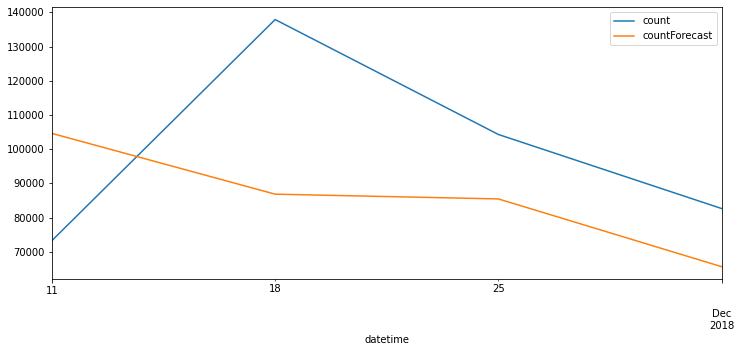

In [93]:
df['count'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['countForecast'].plot(legend=True);

In [94]:
RMSE2 = rmse(df['count'][-nobs:], df_forecast['countForecast'])
print(f'count_prediction VAR(2) RMSE: {RMSE2:.3f}')

count_prediction VAR(2) RMSE: 32489.277


Conclusion:
It makes more sense to resample the data to daily frequency before modeling, according to the respective evaluation metric.
However, even though the result is better with the daily frequency, the prediction is not much better than a mean reversion result.

---